# Cancer Tumor Detection using KNN Algorithm

Consider The Wisconsin Breast Cancer Database. 

This dataset consists of 10 continuous attributes and 1 target class attributes. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

Breast Cancer Data Set Attribute Information:
1. Sample code number: id number
2. Clump Thickness: 1 – 10
3. Uniformity of Cell Size: 1 – 10
4. Uniformity of Cell Shape: 1 – 10
5. Marginal Adhesion: 1 – 10
6. Single Epithelial Cell Size: 1 – 10
7. Bare Nuclei: 1 – 10
8. Bland Chromatin: 1 – 10
9. Normal Nucleoli: 1 – 10
10. Mitoses: 1 – 10
11. Class: (2 for benign, 4 for malignant)

# Problem Statement:

# Model the KNN classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor.

KNN Model for Cancerous tumor detection:

To diagnose Breast Cancer, the doctor uses his experience by analyzing details provided by

1. Patient’s Past Medical History
2. Reports of all the tests performed.

Using the modeled KNN classifier, we will solve the problem in a way similar to the procedure used by doctors. 

The modeled KNN classifier will compare the new patient’s test reports, observation metrics with the records of patients(training data) that correctly classified as benign or malignant.

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from scipy.stats import zscore

In [6]:
from sklearn.preprocessing import Imputer

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
import seaborn as sns

In [9]:
# A small function to compare predicted values with actual and count how many are correct

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [10]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')

# weights :  optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
# ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘ distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [11]:
bc_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/wisc_bc_data.csv")

In [12]:
bc_df.shape

(569, 32)

In [13]:
bc_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
bc_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
bc_df.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [16]:
bc_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [51]:
bc_df.groupby(["diagnosis"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [18]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


drop the first column from the data frame. This is Id column which is not used in modeling

In [19]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)
# bc_df.drop(labels = "id", axis = 1, inplace = True)

In [20]:
bc_df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


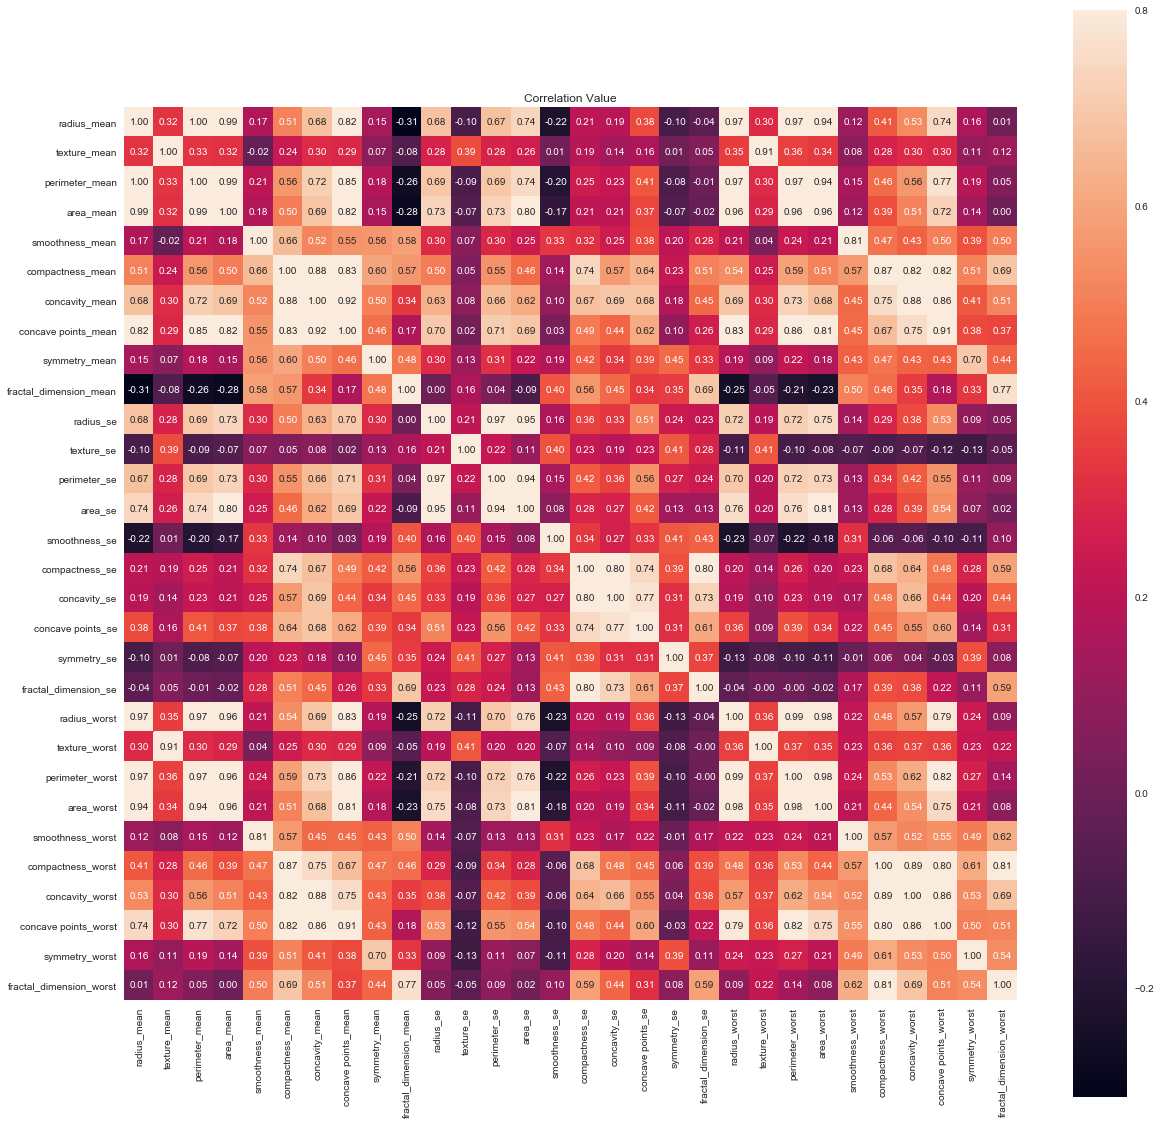

In [60]:
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
my_cmap = ListedColormap(sns.mpl_palette("Blues"))
ax = sns.heatmap(bc_df.corr(), vmax=.8, fmt='.2f', annot=True, square=True)
plt.title('Correlation Value')
plt.show()

In [21]:
# Create a separate dataframe consisting only of the features i.e independent attributes

bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

In [22]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

In [23]:
bc_feature_df_z

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [24]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

bc_labels = bc_df["diagnosis"]

In [25]:
# store the normalized features data into np array 

X = np.array(bc_feature_df_z)

In [26]:
# store the bc_labels data into a separate np array

Y = np.array(bc_labels)

In [27]:
# Break the data into training and test set

X_Train = X[ :400, :]

In [28]:
X_Test = X[401: , :]

In [29]:
# break the Y into training and test set labels
Y_Train = Y[:400, ]

In [30]:
Y_Test = Y[401:, ]

In [31]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [32]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [33]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_Test, predicted_labels)

In [34]:
print(accuracy_score)

97.61904761904762


In [35]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


In [36]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix



In [37]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [38]:
# To to drop dependent columns from bc_df

bc_features_pruned_df_z =  bc_feature_df_z.drop(['perimeter_mean', 'area_mean'], axis=1)

In [39]:
X = np.array(bc_features_pruned_df_z)

In [40]:
# Break the data into training and test set

X_Train = X[ :400, :]

In [41]:
X_Test = X[401: , :]

In [42]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [43]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [44]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_Test, predicted_labels)

In [45]:
print(accuracy_score)

98.21428571428571


In [46]:
#cross tab

In [47]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(Y_Test,predicted_labels)

0.9821428571428571

In [49]:
metrics.confusion_matrix(Y_Test,predicted_labels)

array([[130,   0],
       [  3,  35]])

In [50]:
cr=metrics.classification_report(Y_Test,predicted_labels)
print(cr)

             precision    recall  f1-score   support

          B       0.98      1.00      0.99       130
          M       1.00      0.92      0.96        38

avg / total       0.98      0.98      0.98       168

